In [26]:
#Bibliotheken
import numpy as np                         
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random 
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [27]:
#Abrufen des Datensatz
df = pd.read_csv(r'C:\Users\Persianboy\Documents\MATLAB\Data.csv',header=None)

In [28]:
#Bestimmen des Eingangs und Ausgangs
X = df.drop(1000, axis = 1).values
y = df[1000].values

In [29]:
#Bestimmen der Test-und Traindaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
#Architektur des NN
model = Sequential()
model.add(Dense(16,activation = 'relu', input_shape =(1000,)))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(4,activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(optimizer='Adam', loss='mae')
model.optimizer.lr = 0.001

In [31]:
#Stoppen des Trainierens im optimalen Epoch
early_stop = EarlyStopping(monitor ='val_loss',mode ='min',verbose=1,patience=25)

In [32]:
#Trainieren des Models
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=300,batch_size=128, callbacks=[early_stop])

Epoch 1/300
20/20 [==============================] - 10s 43ms/step - loss: 9.7999 - val_loss: 9.0845
Epoch 2/300
20/20 [==============================] - 0s 8ms/step - loss: 8.2224 - val_loss: 7.1332
Epoch 3/300
20/20 [==============================] - 0s 12ms/step - loss: 5.9654 - val_loss: 4.6849
Epoch 4/300
20/20 [==============================] - 0s 7ms/step - loss: 3.6383 - val_loss: 2.7425
Epoch 5/300
20/20 [==============================] - 0s 7ms/step - loss: 1.9177 - val_loss: 1.3597
Epoch 6/300
20/20 [==============================] - 0s 4ms/step - loss: 0.9545 - val_loss: 0.7086
Epoch 7/300
20/20 [==============================] - 0s 6ms/step - loss: 0.5087 - val_loss: 0.4460
Epoch 8/300
20/20 [==============================] - 0s 4ms/step - loss: 0.3640 - val_loss: 0.3529
Epoch 9/300
20/20 [==============================] - 0s 4ms/step - loss: 0.3074 - val_loss: 0.3286
Epoch 10/300
20/20 [==============================] - 0s 4ms/step - loss: 0.2629 - val_loss: 0.2625
Epoch 

Epoch 83/300
20/20 [==============================] - 0s 4ms/step - loss: 0.0744 - val_loss: 0.0646
Epoch 84/300
20/20 [==============================] - 0s 4ms/step - loss: 0.0794 - val_loss: 0.0780
Epoch 85/300
20/20 [==============================] - 0s 4ms/step - loss: 0.0828 - val_loss: 0.0740
Epoch 86/300
20/20 [==============================] - 0s 4ms/step - loss: 0.0711 - val_loss: 0.0718
Epoch 87/300
20/20 [==============================] - 0s 4ms/step - loss: 0.0678 - val_loss: 0.0619
Epoch 88/300
20/20 [==============================] - 0s 4ms/step - loss: 0.0629 - val_loss: 0.0780
Epoch 89/300
20/20 [==============================] - 0s 5ms/step - loss: 0.0733 - val_loss: 0.0756
Epoch 90/300
20/20 [==============================] - 0s 4ms/step - loss: 0.0715 - val_loss: 0.0771
Epoch 91/300
20/20 [==============================] - 0s 7ms/step - loss: 0.0702 - val_loss: 0.0686
Epoch 92/300
20/20 [==============================] - 0s 12ms/step - loss: 0.0706 - val_loss: 0.0669

In [33]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

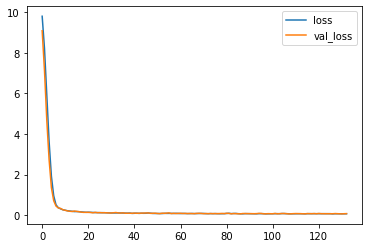

In [34]:
loss_df.plot()

In [35]:
model.evaluate(X_test,y_test,verbose=0)

0.07339435815811157

In [36]:
model.evaluate(X_train,y_train,verbose=0)

0.07013034075498581

In [37]:
test_predictions = model.predict(X_test)

34/34 [==============================] - 8s 1ms/step


In [38]:
test_predictions = pd.Series(test_predictions.reshape(1086,))

In [39]:
pred_df = pd.DataFrame(y_test)

In [40]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [41]:
pred_df.columns = ['Test True Frequency', 'Estimated Frequency']

In [44]:
pred_df = round(pred_df,1)

In [45]:
#Testfrequenzen vs. eingeschätzte Frequenzen
pred_df

,Test True Frequency,Estimated Frequency
0,8,8.000000
1,17,17.000000
2,12,12.000000
3,16,16.200001
4,20,20.000000
...,...,...
1081,14,14.100000
1082,13,13.000000
1083,5,5.000000
1084,7,7.200000


In [46]:
# Generierung zufällige Daten zum Testen des Models

A = 1 #Amplitude

x_pruef = []
y_pruef = []
    
for i in range(1,21,1):    
    y_pruef.append(i)

# Time Vector
x = np.arange(0,1,0.001)

# y-Vector

for i in y_pruef:
    phase_shift = round(random.random()*100,2)
    x_pruef.append([A*np.sin(2*np.pi*x*i+(90*phase_shift*np.pi)/90)])




x_pruef1 = np.array(x_pruef).reshape((20,1000))
   


y_pred=model.predict(x_pruef1)

for i in range(20):
    test = y_pred[i]
    test = round(float(test), 0)
    print(test)

1/1 [==============================] - 0s 55ms/step
3.0
2.0
3.0
3.0
5.0
6.0
7.0
8.0
9.0
7.0
11.0
9.0
13.0
14.0
11.0
13.0
17.0
10.0
17.0
16.0
